# Exploring the BRFSS data

## Setup

### Load packages

In [21]:
import pandas as pd
import os

## Load data

In [27]:
cdcStats = pd.read_csv('C:\\Users\\Michelle Christmas\\Desktop\Python Programming Course\\brfss2013.csv', encoding='iso-8859-1' , low_memory=False)

## Part 1: Data

### Scope of Inference:

#### Description

BRFSS’s objective is to collect uniform state-specific data on health risk behaviors, chronic diseases and conditions, access to health care, and use of preventive health services related to the leading causes of death and disability in the United States. Factors assessed by the BRFSS in 2016 included health status, healthy days/health-related quality of life, health care access, exercise, inadequate sleep, chronic health conditions, oral health, tobacco use, e-cigarettes, alcohol consumption, immunization, falls, seat belt use, drinking and driving, breast- and cervical cancer screening, prostate cancer screening, colorectal cancer screening, and HIV/AIDS knowledge.


**The target population: adult population ages greater or equal to 18 years residing in the United States, as well as US territories.**

**How the observations in the sample are collected?**
**Answer:** The sample data is collected via survey that is the survey is conducted using Random Digit Dialing (RDD) techniques on both landlines and cell phones. Random digit dialing (RDD) is a method for selecting people for involvement in telephone statistical surveys by generating telephone numbers at random.

According to the overview_2016 pdf document, In conducting the landline telephone survey, interviewers collect data from a randomly selected adult in a household. In conducting the cellular telephone survey, interviewers collect data from adults answering the cellular telephones residing in a private residence or college housing. Beginning in 2014, all adults contacted through their cellular telephone were eligible regardless of their landline phone use (i.e., complete overlap). 

**Type of study**: Observational Study

**Form of Observational Study**: Retrospective Study

**What are the implications of this data collection?**

**Answer**:

BRFSS study can be classified as **observational study.** The researcher or interviewer is recording the responses of the population sample being surveyed, that is responders are not being influenced or manipulated by the interviewer.
and measures variables, but does not influence the population in any way or attempt to intervene in the study. There is no manipulation by the researcher. given that there is random sampling but no random assignment this study can be used for correlation and generalizability of the population, but not causality.

“An important consideration in random digit dialing surveys is bias introduced by non-responders. Non-response bias can be a problem if responders differ from non-responders for the measured variables. For example, non-responders may not have been contacted because they work multiple minimum-wage jobs. Various techniques are used to reduce the non-response rate, such as multiple call attempts, monetary incentives, advance letters, and leaving messages on answering machines, because reducing the non-response rate may directly reduce non-response bias. In addition, when trying to calculate total error estimates, response rate calculations can be imprecise because it can be difficult to determine whether certain telephone numbers are interviewable. When the desired coverage area matches up closely enough with country codes and area codes, random digits can be chosen within the desired area codes. In cases where the desired region does not match area codes (for instance, electoral districts), surveys must rely on telephone databases, and must rely on self-reported address information for unlisted numbers. Increasing use of mobile phones (although there are currently techniques which allow infusion of wireless phones into the RDD sampling frame), number portability, and VoIP have begun to decrease the ability for RDD to target specific areas within a country and achieve complete coverage.”

**Generalizability:** 
Given that This servey study is an **observational study** it can only make generalizabilities to persons 18 or older residing in the US and US territories

**References**

Source: https://en.wikipedia.org/wiki/Random_digit_dialing <br>
Source: https://mathbitsnotebook.com/Algebra2/Statistics/STSurveys.html <br>
source: https://www.cdc.gov/brfss/annual_data/2016/pdf/overview_2016.pdf  <br>
Source: OpenIntro Statistics Third Edition by David M Diez et. all



## Part 2: Research questions

**Research quesion 1:**
Does number of hours of sleep contributes to poor mental health, that is not feeling good?. The two variable to be explored are **sleptim1**:How Much Time Do You Sleep in 24 hours, variable type: continuous and **menthlth**:Number Of Days Mental Health Not Good. Anectodal we know that sleep can affect your mood, so it would be interesting to know if number of hours of sleep can make you have better mental health or poor mental health, with this data I may not be able to stablish causality but I would like to know if there is some relationship

**Research quesion 2:**
Does number of hours of sleep contributes to poor physical health, that is not feeling good? The two variable to be explored are sleptim1:How Much Time Do You Sleep in 24 hours and **poorhlth**: Poor Physical Or Mental Health; and **qlmentl2**:How Many Days Depressed In Past 30 Days. Anectodal we heard that sleep can affect your mood, so it would be interesting to know if number of hours of sleep can make you have better physical health or poor physical health, wiht this data I may not be able to stablish causality but I would like to know if there is some relationship.

**Research quesion 3:**
How do men and women compare in general health and feeling depressed? The two variable to be explored are **genhlth**:categorical variable, describes general your health as excellent, very good, good, fair and poor and **qlmentl2**:continuous variable that describes how Many days depressed In Past 30 Days and the **sex**: categorical variable. It would be interesting to know if there is much difference between how men and women feel about their general health as well as how if men feel more depressed or less depressed than wome.

## Part 3: Exploratory data analysis

**Research quesion 1:**

In [29]:
import numpy as np

In [30]:
#Filter = np.isnan(cdcStats['sleptim1']) for empty na values
cdcStats = cdcStats[~np.isnan(cdcStats['sleptim1'])]


In [31]:
#Filter data for values <= 24 hours
cdcStats = cdcStats[(cdcStats['sleptim1']<=24)]

In [32]:
#Filter data for NA values
cdcStats = cdcStats[~np.isnan(cdcStats['menthlth'])]

In [33]:
#filter data for days of mental health not feeling good <= 30 days
cdcStats = cdcStats[(cdcStats['menthlth']<=30)]


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = 8,4
%matplotlib inline

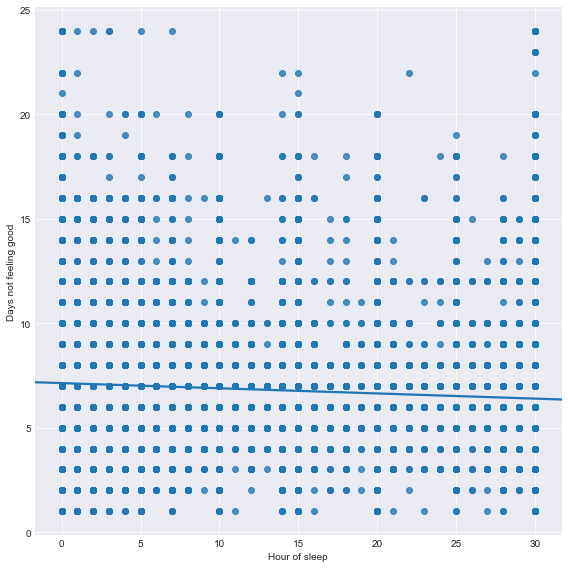

In [35]:
v1s4 = sns.lmplot(x="menthlth", y = "sleptim1", data=cdcStats, size=8)
plt.xlabel("Hour of sleep")
plt.ylabel("Days not feeling good")
plt.show(v1s4)

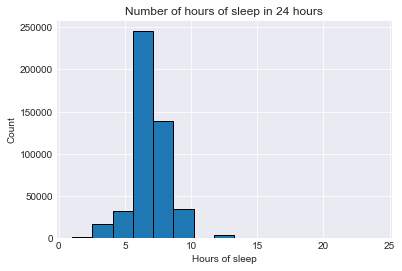

In [36]:
sns.set_style("darkgrid")
plt.hist(cdcStats['sleptim1'], bins=15,edgecolor='black',)
plt.title("Number of hours of sleep in 24 hours")
plt.xlabel("Hours of sleep")
plt.ylabel("Count")
plt.show()

In [37]:
#summary of statistics
cdcStats.sleptim1.describe()

count    476614.000000
mean          7.052298
std           1.458263
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: sleptim1, dtype: float64

It does not seem to be an association based on this data between number of hours of sleep and mental health. As we can see noted by the mean of sleep hours in 24 hours most surveyed participant get 7 hours of sleep on average on 24 hour period. The histogram for hours of sleep is right skewed where it shows some interviewee get more than 7 hours of sleep in a 24 hours

### Reseach question 2

In [10]:
#Filter = np.isnan(cdcStats['qlmentl2']) for empty na values
cdcStats = cdcStats[~np.isnan(cdcStats['qlmentl2'])]

In [11]:
#filter data for days of mental health not feeling good <= 30 days
cdcStats = cdcStats[(cdcStats['physhlth']<=30)]

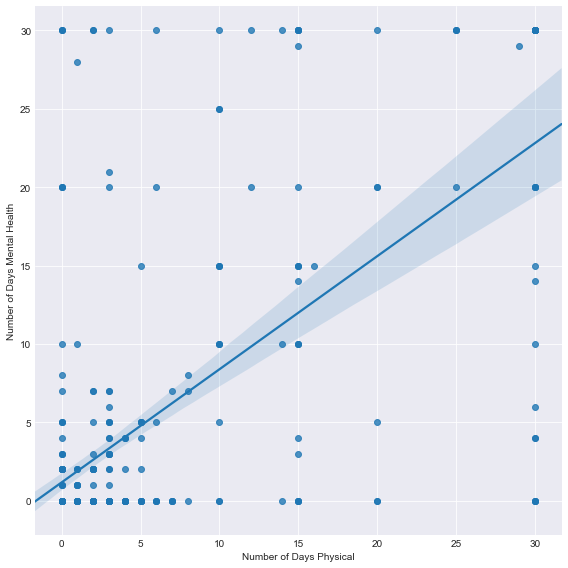

In [17]:
sns.set_style("darkgrid")
v1s6 = sns.lmplot(x="qlmentl2", y = "menthlth", data=cdcStats, size=8)
plt.xlabel("Number of Days Physical")
plt.ylabel("Number of Days Mental Health")
plt.show(v1s6)

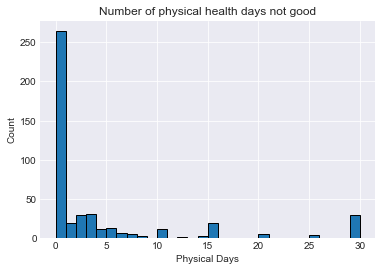

In [18]:
#histogram for the number of physical health of days not good
plt.hist(cdcStats['qlmentl2'], bins=30,edgecolor='black',)
plt.title("Number of physical health days not good")
plt.xlabel("Physical Days")
plt.ylabel("Count")
plt.show()

In [14]:
#summary of statistics
cdcStats.qlmentl2.describe()

count    462.000000
mean       4.344156
std        8.276444
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       30.000000
Name: qlmentl2, dtype: float64

it does not seem to be an association based on this data between number of hours of physical days not good and mental health. The histogram for physical days not good is right skewed 

## Research question 3

In [41]:
cdcStatsMale = cdcStats[(cdcStats.sex == 'Male')]

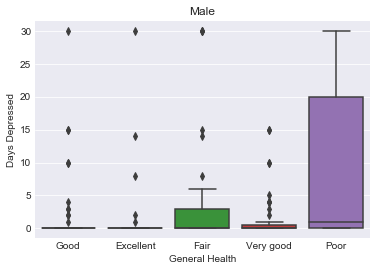

In [39]:
vis2 = sns.boxplot(data = cdcStatsMale, x=cdcStatsMale.genhlth, y = cdcStatsMale.qlmentl2)
plt.xlabel("General Health")
plt.ylabel("Days Depressed")
plt.title("Male") # You can comment this line out if you don't need title
plt.show(vis2)


In [44]:
#summary of statistics Male
cdcStatsMale.groupby(['sex', 'genhlth'])['qlmentl2'].describe()


count       mean        std  min  25%  50%   75%   max
sex  genhlth                                                          
Male Excellent   29.0   1.896552   6.154817  0.0  0.0  0.0   0.0  30.0
     Fair        35.0   4.400000   8.758861  0.0  0.0  0.0   3.0  30.0
     Good        47.0   2.021277   5.518701  0.0  0.0  0.0   0.0  30.0
     Poor        13.0  10.846154  12.979767  0.0  0.0  1.0  20.0  30.0
     Very good   43.0   1.697674   3.820589  0.0  0.0  0.0   0.5  15.0

In [45]:
cdcStatsFem = cdcStats[(cdcStats.sex == 'Female')]

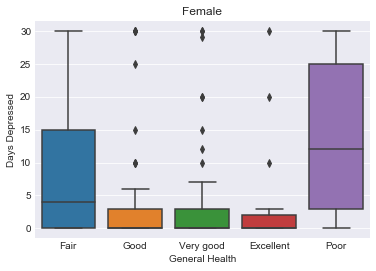

In [25]:
vis3 = sns.boxplot(data = cdcStatsFem, x=cdcStatsFem.genhlth, y = cdcStatsFem.qlmentl2)
plt.xlabel("General Health")
plt.ylabel("Days Depressed")
plt.title("Female") # You can comment this line out if you don't need title
plt.show(vis3)

In [46]:
#summary of statistics Female cdcStatsFem
cdcStatsFem.groupby(['sex', 'genhlth'])['qlmentl2'].describe()


count       mean        std  min  25%   50%   75%   max
sex    genhlth                                                           
Female Excellent   32.0   1.656250   3.898795  0.0  0.0   0.0   2.0  20.0
       Fair        58.0   8.862069  10.779201  0.0  0.0   4.0  15.0  30.0
       Good        90.0   2.755556   6.257241  0.0  0.0   0.0   3.0  30.0
       Poor        34.0  13.147059  11.719273  0.0  3.0  10.0  25.0  30.0
       Very good   88.0   2.954545   6.385884  0.0  0.0   0.0   3.0  30.0

According to the data of participants serveyed, on average men feel less depressed and in poor health than women and given that this is an observational study we can only generalized this to the population, or see it as a correlation but not causation that is general feelings of health vs feeling depressed between men and women.